In [2]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

C:\Users\Heming\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
num_classes = 2
resnet_weights_path = '../model/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

model = Sequential()
model.add(ResNet50(include_top = False, pooling = 'avg', weights = resnet_weights_path))
model.add(Dense(num_classes, activation = 'softmax'))

model.layers[0].trainable = False

In [4]:
model.compile(optimizer = 'sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

image_size = 224
data_generator = ImageDataGenerator(
                                    preprocessing_function=preprocess_input,
                                    featurewise_center=False,
                                    horizontal_flip = True,
                                    rotation_range = 10
                                                                        
                                    )

train_generator = data_generator.flow_from_directory(
       directory = '../images/train',
       target_size=(image_size, image_size),
       batch_size= 10,
       class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
       directory = '../images/val',
       target_size=(image_size, image_size),
       class_mode='categorical')


Found 198 images belonging to 2 classes.
Found 84 images belonging to 2 classes.


In [6]:
model.fit_generator(
       train_generator,
       steps_per_epoch= 25,
       epochs = 10,
       validation_data= validation_generator,
       validation_steps=1)

Epoch 1/10
25/25 [==============================] - 237s 9s/step - loss: 0.5102 - acc: 0.7391 - val_loss: 0.1676 - val_acc: 0.9688
Epoch 2/10
25/25 [==============================] - 240s 10s/step - loss: 0.2728 - acc: 0.8950 - val_loss: 0.1196 - val_acc: 0.9688
Epoch 3/10
25/25 [==============================] - 227s 9s/step - loss: 0.1896 - acc: 0.9241 - val_loss: 0.1049 - val_acc: 1.0000
Epoch 4/10
25/25 [==============================] - 256s 10s/step - loss: 0.1581 - acc: 0.9400 - val_loss: 0.0559 - val_acc: 1.0000
Epoch 5/10
25/25 [==============================] - 247s 10s/step - loss: 0.1216 - acc: 0.9720 - val_loss: 0.0669 - val_acc: 0.9688
Epoch 6/10
25/25 [==============================] - 229s 9s/step - loss: 0.1239 - acc: 0.9670 - val_loss: 0.0846 - val_acc: 0.9688
Epoch 7/10
25/25 [==============================] - 225s 9s/step - loss: 0.0932 - acc: 0.9840 - val_loss: 0.0763 - val_acc: 0.9688
Epoch 8/10
25/25 [==============================] - 236s 9s/step - loss: 0.0989 

In [7]:
from os.path import join

test_dir = '../images/test/'

image_fnames_drug = ['drug_{:0>2d}.jpg'.format(i) for i in range(1,12)]
image_fnames_normal = ['normal_{:0>2d}.jpg'.format(i) for i in range(1,16)]
image_fnames = image_fnames_drug + image_fnames_normal

image_paths = [test_dir + fname for fname in image_fnames]


In [8]:
import numpy as np
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array

def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = preprocess_input(img_array)
    return(output)

In [12]:
test_data = read_and_prep_images(image_paths)
preds = np.argmax(model.predict(test_data),1)

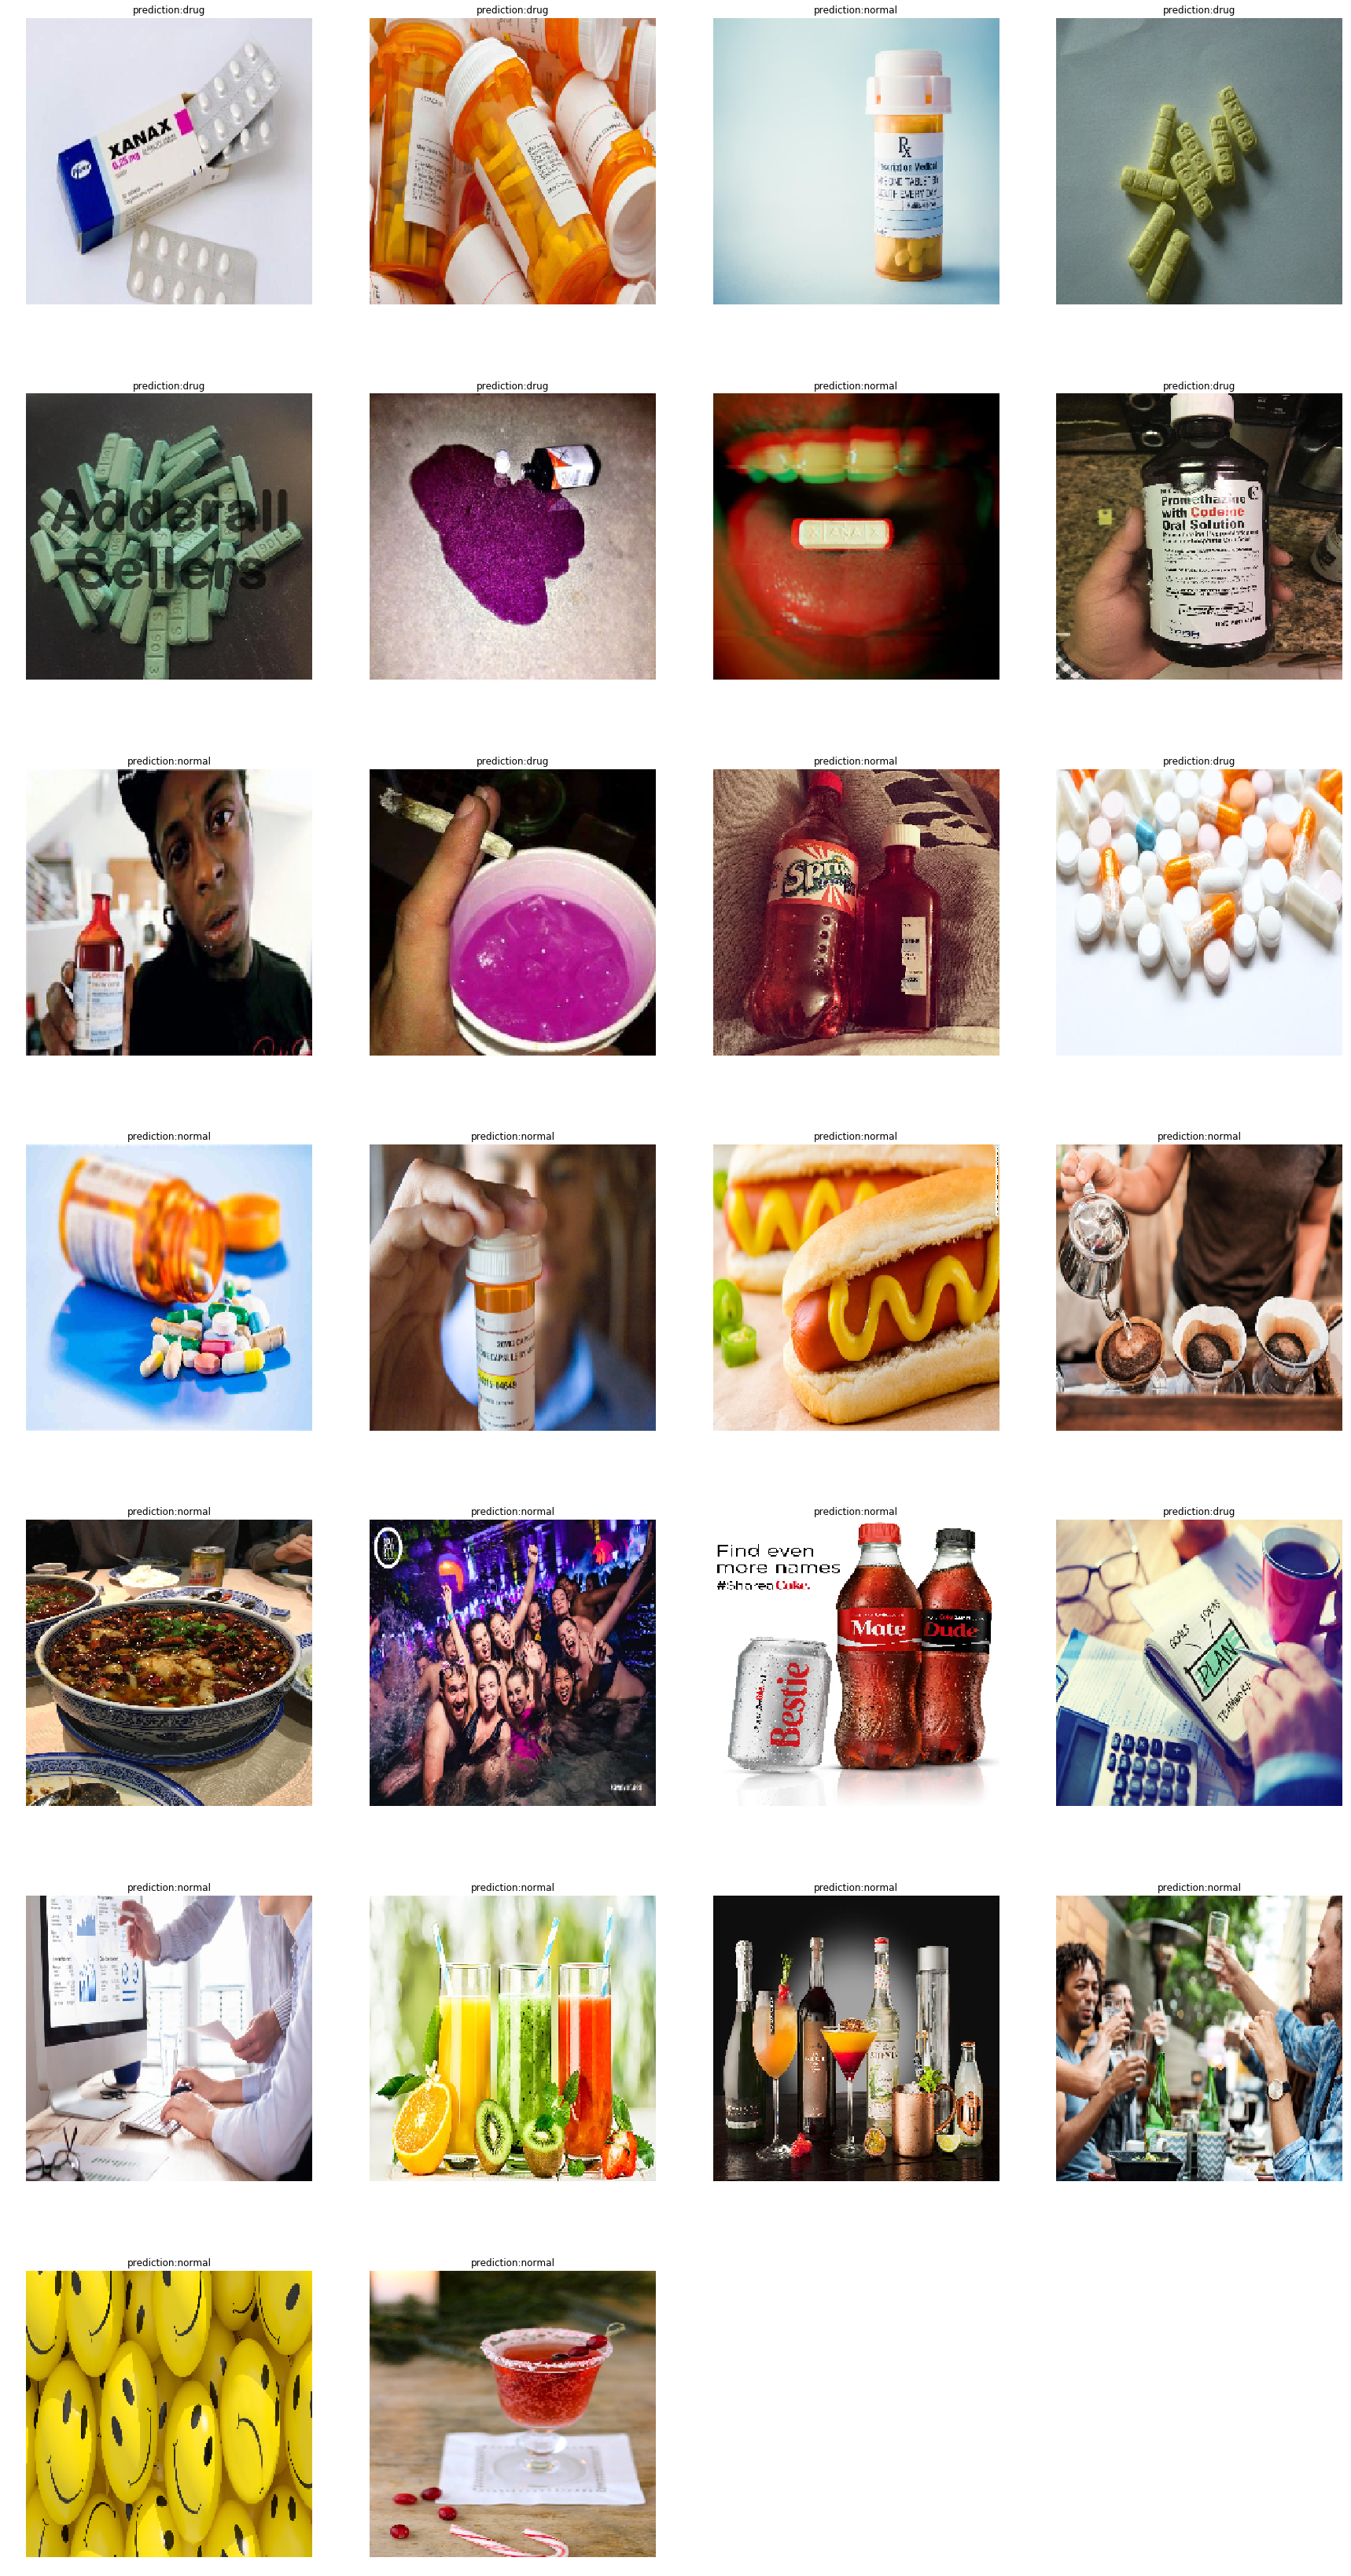

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline
labels = ['drug', 'normal']

plt.figure(figsize=(30,60))
for i in range(26):
    ax = plt.subplot(7,4,i+1)
    img = load_img(image_paths[i], target_size=(image_size, image_size))
    array = np.array(img_to_array(img))/255
    plt.imshow(array)
    ax.axis('off')
    ax.set_title('prediction:{}'.format(labels[preds[i]]))


    

In [14]:
truth = [0]*11 + [1]* 15
acc = np.mean(preds == truth)
print('accuracy is {:.3f}'.format(acc))

accuracy is 0.769
